In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import glob
import os

import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
directory = 'C:\\Users\\yasha\\OneDrive\\Desktop\\music21\\music21datasetwav\\*.wav'
wav_files = glob.glob(directory)
for file in wav_files:
    print(file)

C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_sharp_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\b5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\b5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\c5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\c5_sharp_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\d5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\d5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\d5_sharp_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\e5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\e5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\f5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\mu

In [3]:
ipd.Audio(wav_files[0])

In [4]:
y, sr = librosa.load(wav_files[0])

print(f"""
    y : {y}
    sr : {sr}
    length of audio sample: {len(y)}    
""")


    y : [ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ...  2.4414062e-04
  1.8310547e-04  1.2207031e-04]
    sr : 22050
    length of audio sample: 27567    


In [70]:
#The two-second audios contained audio in mostly the first half, so trimmed every audio in half

for file_path in wav_files:
    y, sr = librosa.load(file_path)
    trimmed_audio = y[:len(y)//2]
    sf.write(file_path, trimmed_audio, sr)

In [5]:
ipd.Audio(wav_files[0])


In [6]:
#After trimming
y, sr = librosa.load(wav_files[0])

print(f"""
    y : {y}
    sr : {sr}
    length of audio sample: {len(y)}    
""")


    y : [ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ...  2.4414062e-04
  1.8310547e-04  1.2207031e-04]
    sr : 22050
    length of audio sample: 27567    


In [73]:
pd.Series(y)

0        0.000000
1       -0.000031
2        0.000031
3       -0.001160
4       -0.002686
           ...   
27562    0.000366
27563    0.000305
27564    0.000244
27565    0.000183
27566    0.000122
Length: 27567, dtype: float32

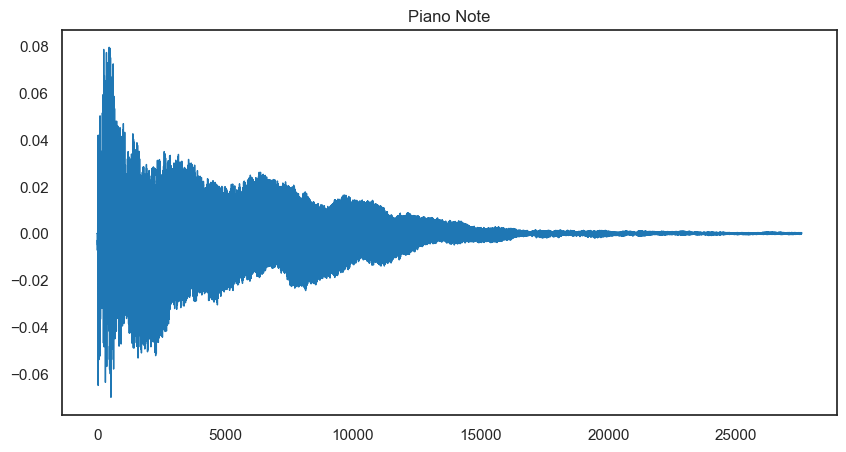

In [75]:
pd.Series(y).plot(figsize=(10,5), lw=1, title='Piano Note')
plt.show()

Spectrogram

In [7]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [20]:
S_db.shape

(1025, 54)

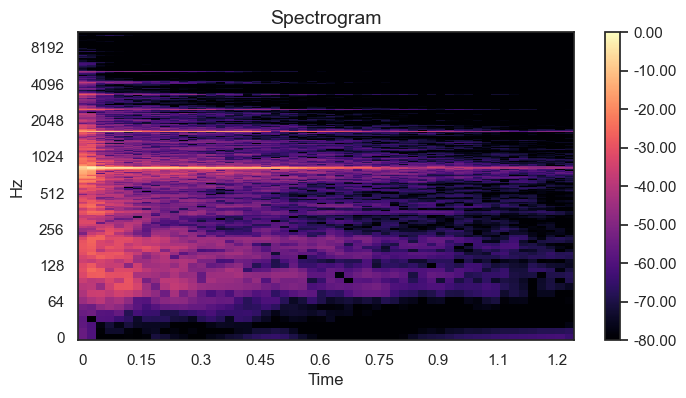

In [78]:
#Plot transformed audio 
fig, ax = plt.subplots(figsize=(8,4))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectrogram', fontsize=14)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Mel-Spectrogram

In [80]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


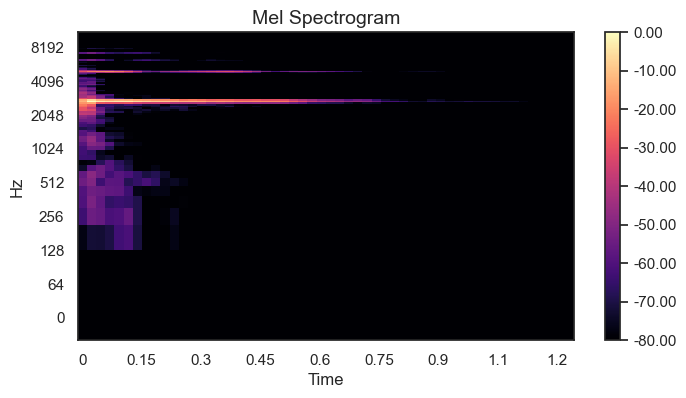

In [81]:
fig, ax = plt.subplots(figsize=(8,4))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Mel Spectrogram', fontsize=14)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [82]:
S

array([[6.24421882e-05, 2.95722857e-05, 1.50331944e-05, ...,
        7.24882852e-07, 7.74938144e-07, 1.25193890e-06],
       [3.09372233e-04, 6.91638270e-04, 1.13584835e-03, ...,
        5.32564215e-08, 2.28730137e-08, 2.66242921e-07],
       [2.38224817e-03, 4.34378535e-03, 4.17752936e-03, ...,
        1.25102099e-06, 5.07122877e-07, 7.20223738e-07],
       ...,
       [1.91349486e-07, 1.81499061e-07, 1.01541616e-07, ...,
        4.79677320e-09, 7.08306347e-09, 4.93885999e-09],
       [2.11311118e-07, 1.50120769e-07, 1.99578821e-07, ...,
        4.88154894e-09, 7.61993313e-09, 7.10952763e-09],
       [1.61968430e-08, 1.52032094e-08, 6.21172491e-09, ...,
        5.82119863e-09, 6.36852082e-09, 6.14030338e-09]], dtype=float32)

In [83]:
S_db

array([[-55.487137, -60.129227, -80.      , ..., -62.297676, -62.146027,
        -64.153305],
       [-55.44895 , -60.03842 , -79.20264 , ..., -68.34201 , -68.07881 ,
        -67.166176],
       [-56.922653, -60.453674, -77.5268  , ..., -80.      , -80.      ,
        -77.461   ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [84]:
S_db_mel

array([[-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-77.21649 , -71.99886 , -72.337845, ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [85]:
#Now performing this for every audio file present
save_directory = "C:/Users/yasha/OneDrive/Desktop/music21/spectrograms"

for file_path in wav_files:
    y, sr = librosa.load(file_path)
    pd.Series(y)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    save_path = os.path.join(save_directory, os.path.splitext(os.path.basename(file_path))[0] + '.npy')
    np.save(save_path, S_db)
    

In [86]:
directory = "C:\\Users\\yasha\\OneDrive\\Desktop\\music21\\spectrograms\\*.npy"
spectrograms = glob.glob(directory)
S_db = np.load(spectrograms[0])

In [87]:
directory = "C:\\Users\\yasha\\OneDrive\\Desktop\\music21\\spectrograms\\*.npy"
for file in directory:
    spectrograms = glob.glob(directory)
   
count = 1 
for spectrogram in spectrograms:
    S_db = np.load(spectrogram)
    print(f"Shape of file {count}: {S_db.shape}")
    count+=1
    

Shape of file 1: (1025, 54)
Shape of file 2: (1025, 22)
Shape of file 3: (1025, 54)
Shape of file 4: (1025, 54)
Shape of file 5: (1025, 54)
Shape of file 6: (1025, 54)
Shape of file 7: (1025, 54)
Shape of file 8: (1025, 54)
Shape of file 9: (1025, 54)
Shape of file 10: (1025, 54)
Shape of file 11: (1025, 54)
Shape of file 12: (1025, 54)
Shape of file 13: (1025, 54)
Shape of file 14: (1025, 54)
Shape of file 15: (1025, 54)
Shape of file 16: (1025, 54)
Shape of file 17: (1025, 54)
Shape of file 18: (1025, 54)
